# Alzheimer's Disease Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the Alzheimer's disease dataset.

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [3]:
# Load the dataset
df = pd.read_csv('../data/raw/alzheimers_disease_data.csv')

print(f"Dataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")

Dataset Shape: (2149, 35)
Number of Samples: 2149
Number of Features: 35


## 3. Dataset Overview

In [4]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   

In [6]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Missing Values Analysis

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
else:
    print("No missing values found!")

No missing values found!


## 5. Target Variable Analysis

Target Variable (Diagnosis) Distribution:
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Percentage:
Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


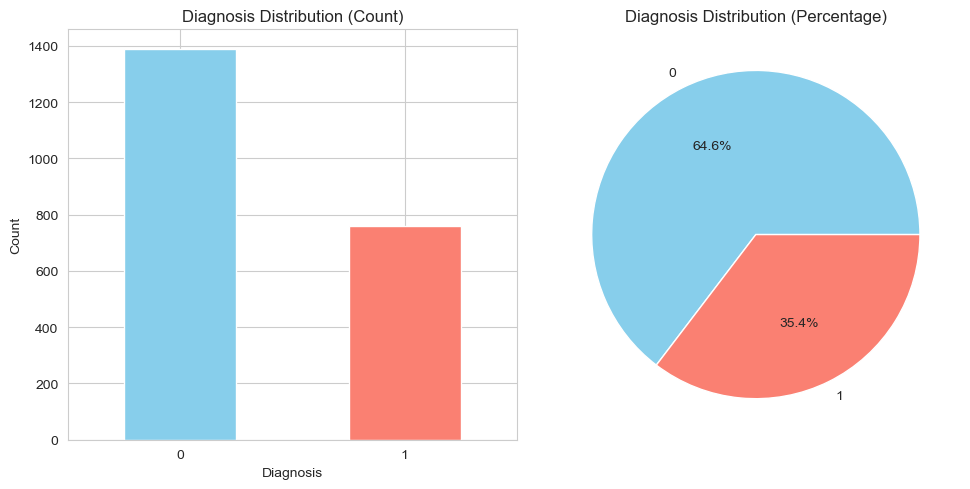

In [8]:
# Analyze target variable distribution
print("Target Variable (Diagnosis) Distribution:")
print(df['Diagnosis'].value_counts())
print("\nPercentage:")
print(df['Diagnosis'].value_counts(normalize=True) * 100)

# Visualize
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['Diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution (Count)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

## 6. Numerical Features Analysis

In [9]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numerical features: {len(numerical_cols)}")
print(f"Numerical features: {numerical_cols[:10]}...")  # Show first 10

Number of numerical features: 34
Numerical features: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']...


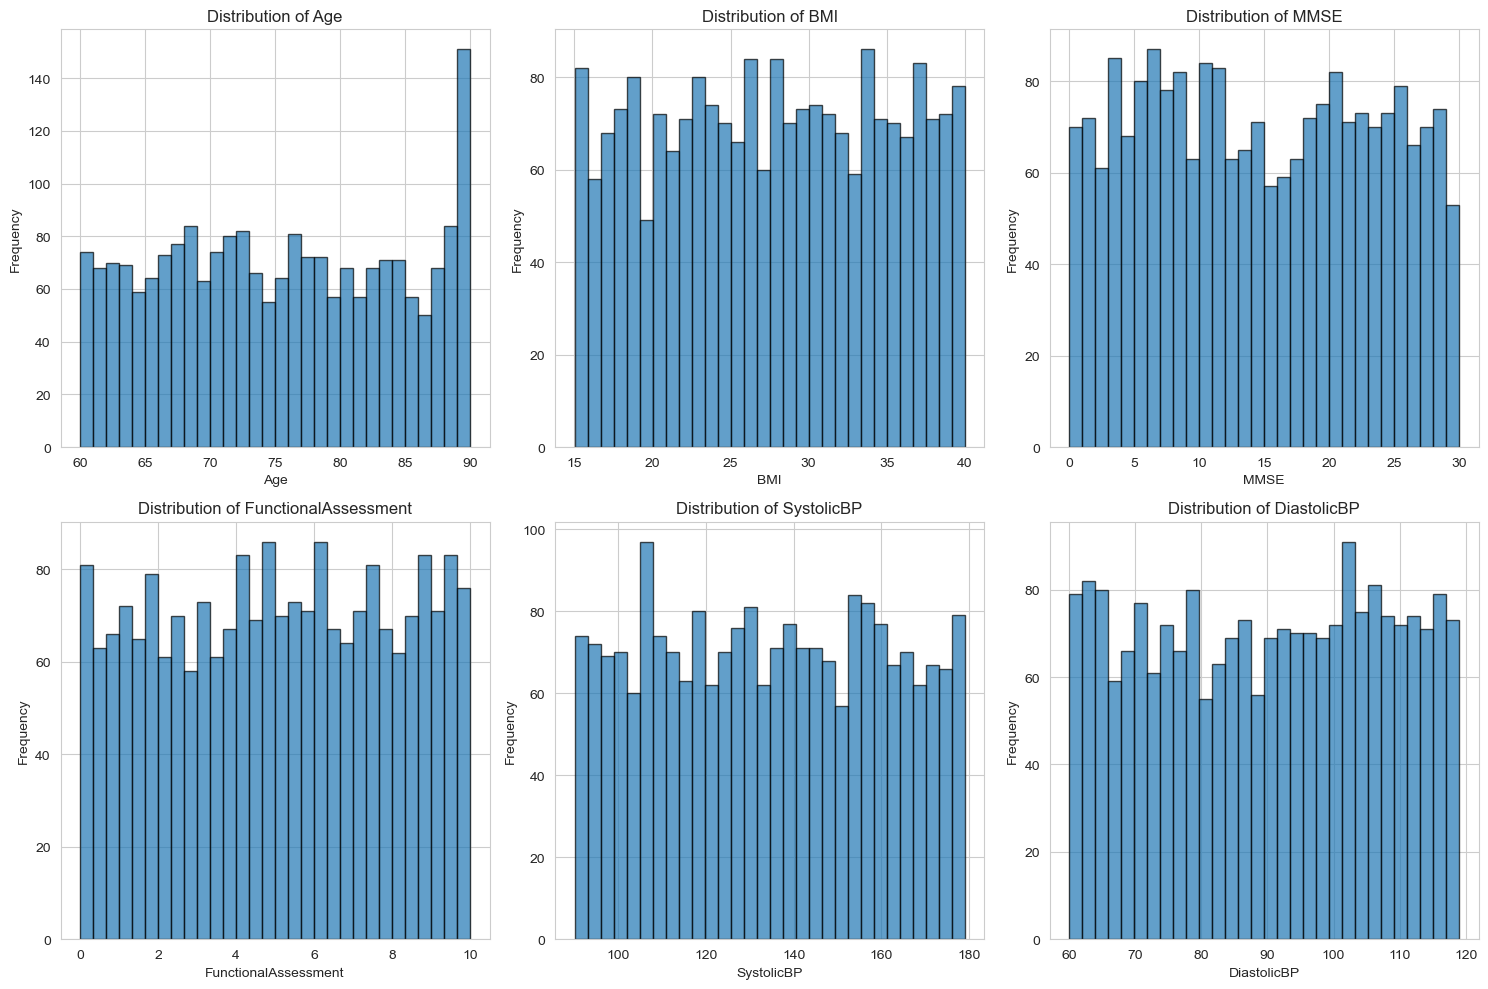

In [10]:
# Distribution of key numerical features
key_features = ['Age', 'BMI', 'MMSE', 'FunctionalAssessment', 'SystolicBP', 'DiastolicBP']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if col in df.columns:
        axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

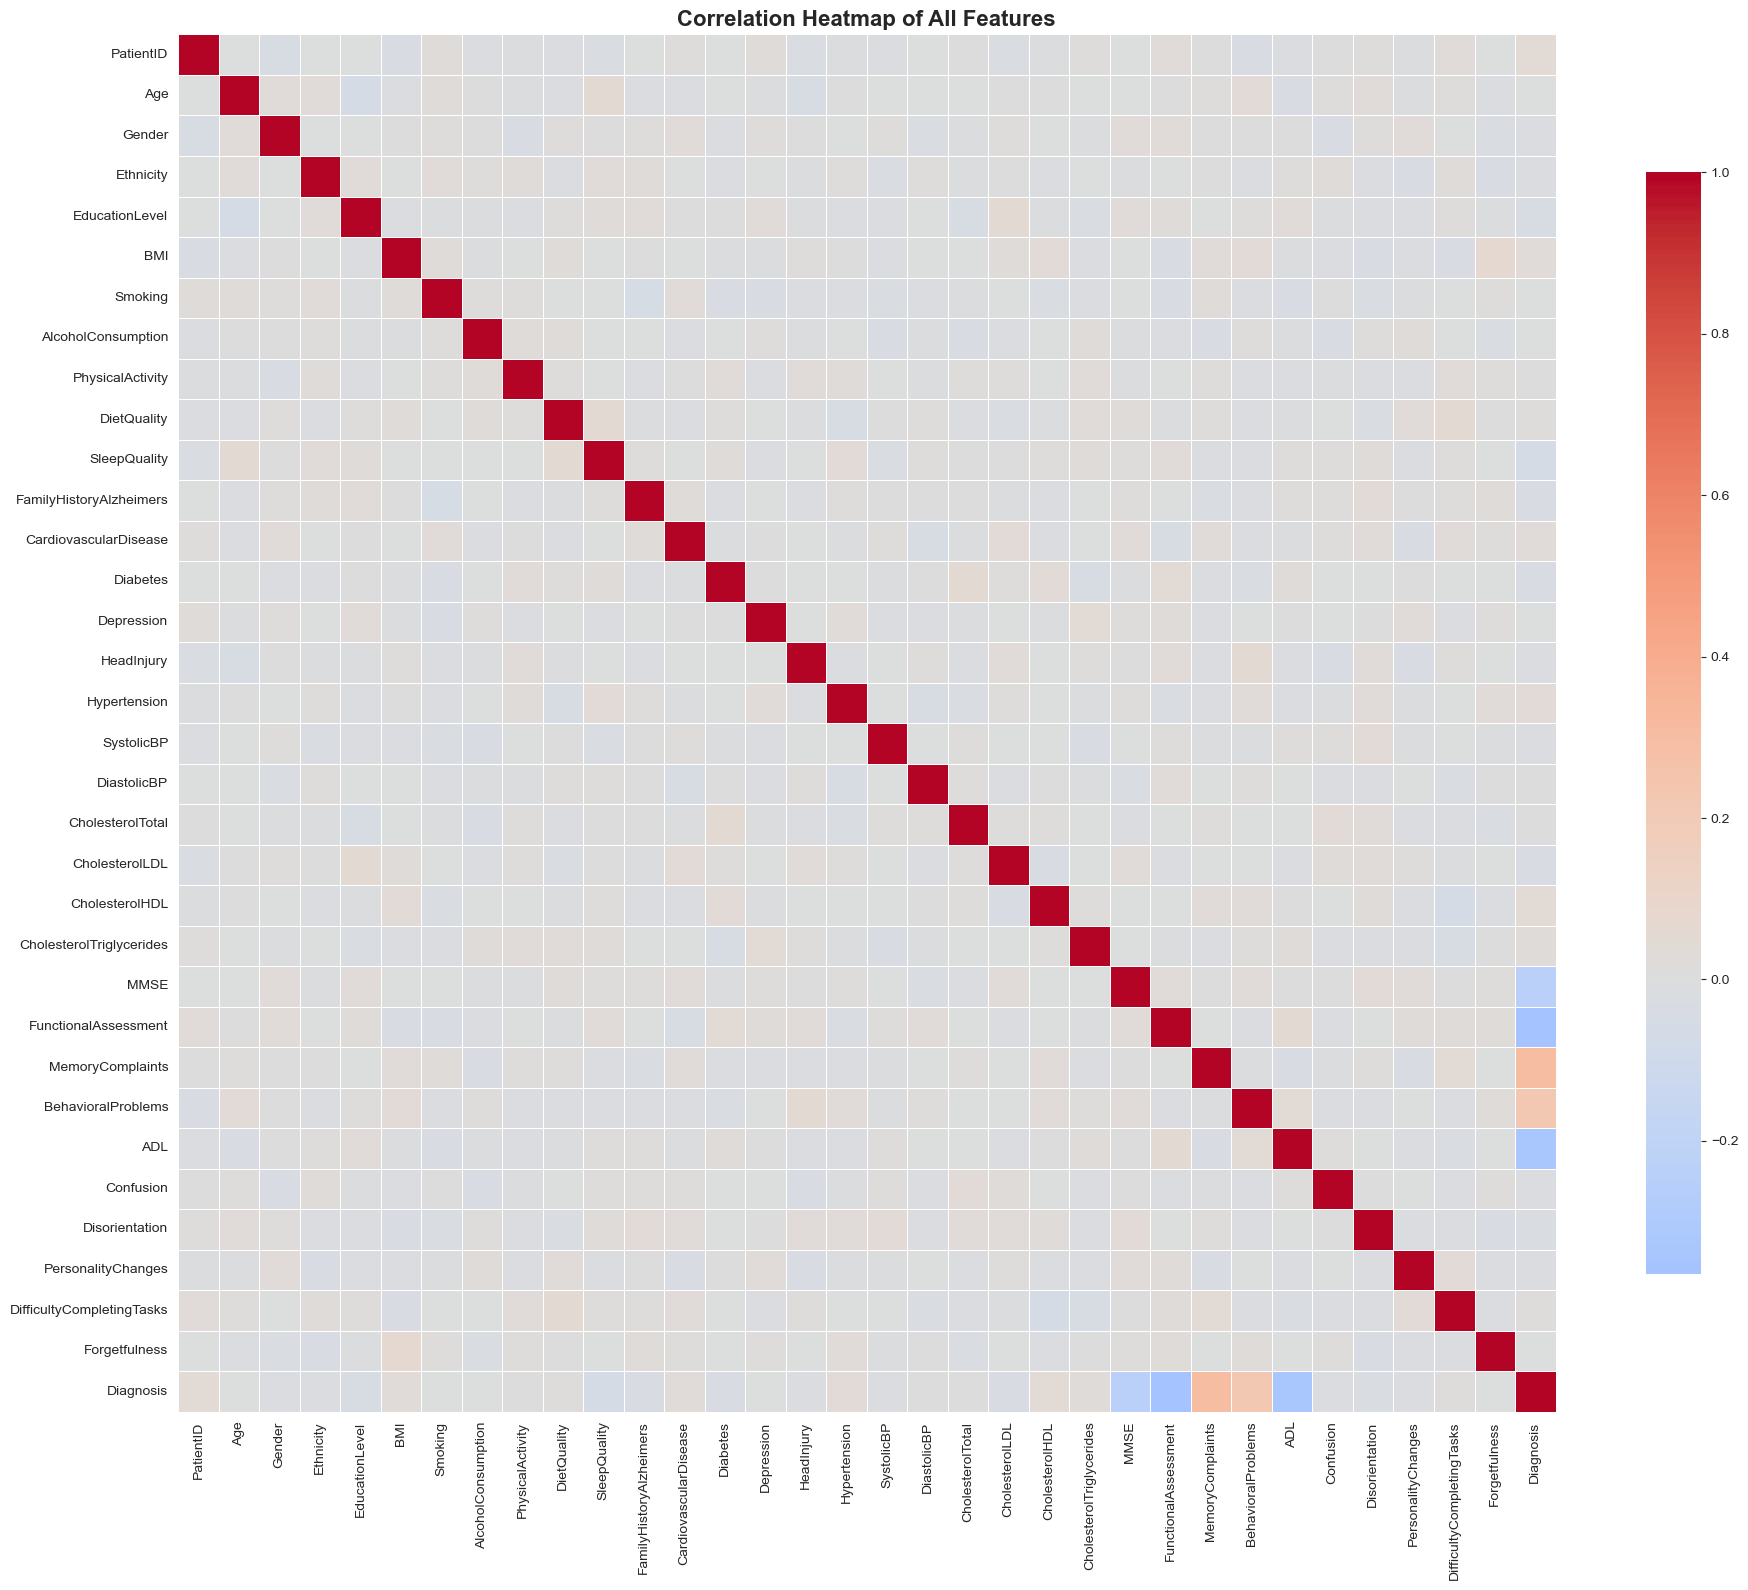

In [11]:
# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Top 15 features correlated with Diagnosis:
Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
PatientID                    0.041019
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Name: Diagnosis, dtype: float64


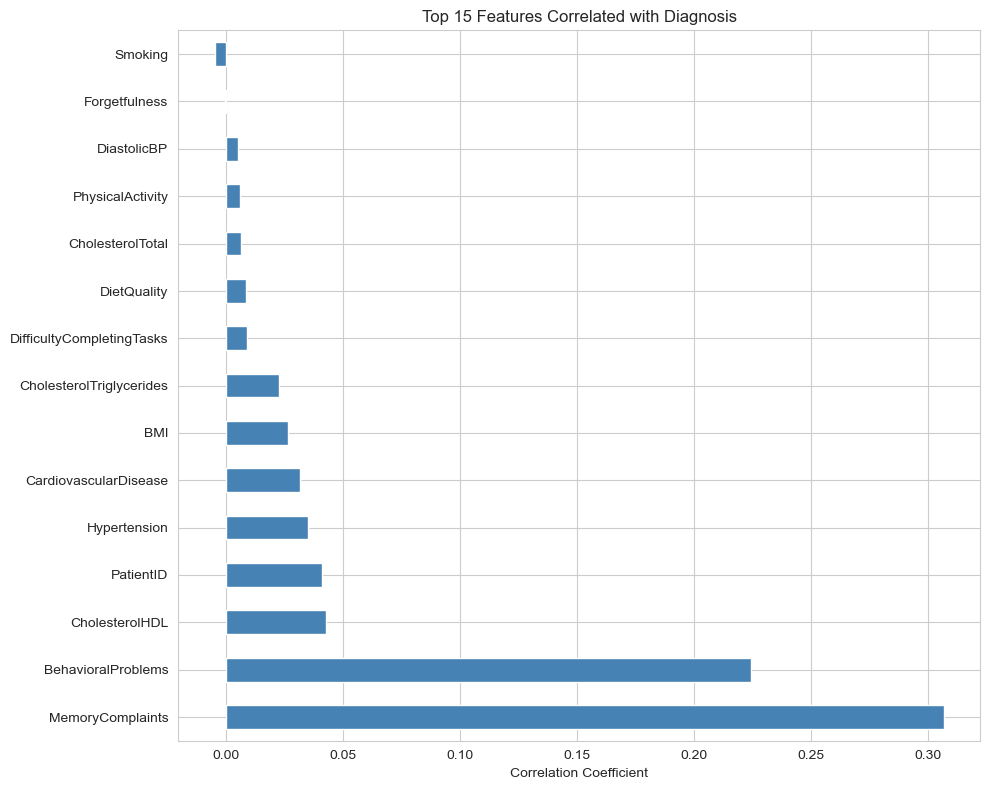

In [12]:
# Top correlations with Diagnosis
if 'Diagnosis' in correlation_matrix.columns:
    diagnosis_corr = correlation_matrix['Diagnosis'].sort_values(ascending=False)
    print("Top 15 features correlated with Diagnosis:")
    print(diagnosis_corr.head(15))
    
    # Visualize
    plt.figure(figsize=(10, 8))
    diagnosis_corr[1:16].plot(kind='barh', color='steelblue')
    plt.title('Top 15 Features Correlated with Diagnosis')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

## 8. Categorical Features Analysis

In [13]:
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Categorical features: ['DoctorInCharge']

DoctorInCharge:
DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64


## 9. Feature Distributions by Diagnosis

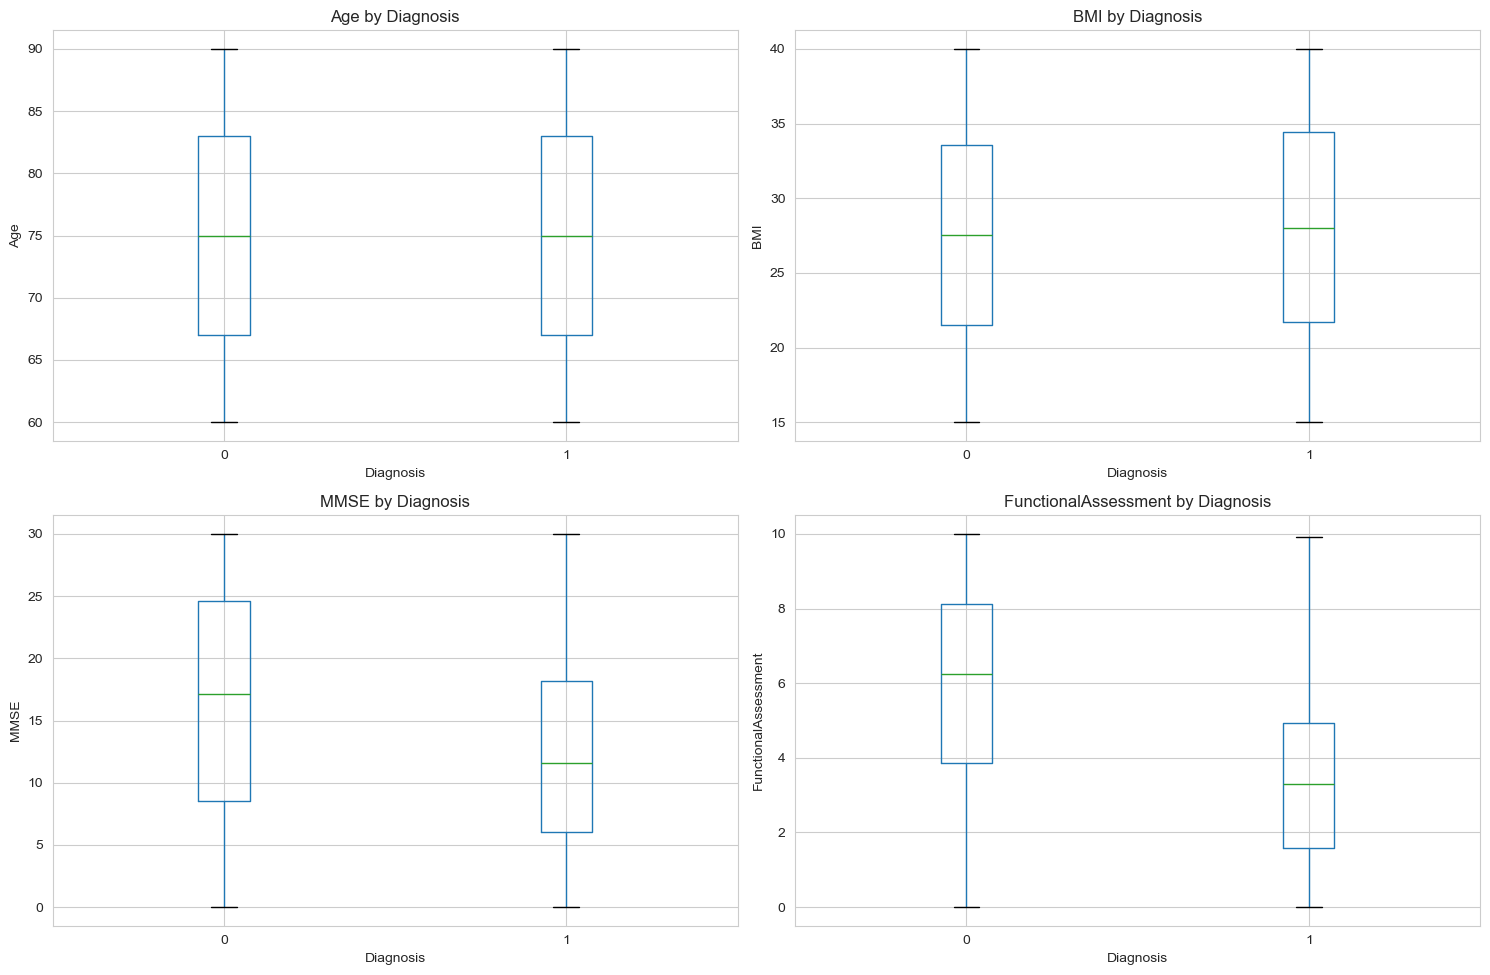

In [14]:
# Compare key features by diagnosis
comparison_features = ['Age', 'BMI', 'MMSE', 'FunctionalAssessment']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(comparison_features):
    if col in df.columns:
        df.boxplot(column=col, by='Diagnosis', ax=axes[idx])
        axes[idx].set_title(f'{col} by Diagnosis')
        axes[idx].set_xlabel('Diagnosis')
        axes[idx].set_ylabel(col)

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

## 10. Outlier Detection

In [15]:
# Detect outliers using IQR method
def detect_outliers(df, columns):
    outlier_summary = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)
    
    return pd.Series(outlier_summary).sort_values(ascending=False)

outlier_counts = detect_outliers(df, key_features)
print("Outlier counts in key features:")
print(outlier_counts)

Outlier counts in key features:
Age                     0
BMI                     0
MMSE                    0
FunctionalAssessment    0
SystolicBP              0
DiastolicBP             0
dtype: int64


## 11. Summary and Insights

### Key Findings:
1. **Dataset Size**: The dataset contains information about patients
2. **Target Distribution**: Check if classes are balanced
3. **Missing Values**: Identify any data quality issues
4. **Feature Correlations**: Identify important predictive features
5. **Outliers**: Understand data quality and potential anomalies

### Next Steps:
1. Data preprocessing and cleaning
2. Feature engineering
3. Model training and evaluation

In [16]:
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS COMPLETED!")
print("="*60)
print(f"\nDataset: {df.shape[0]} samples, {df.shape[1]} features")
print(f"Target variable: Diagnosis")
print(f"Ready for preprocessing and modeling!")


EXPLORATORY DATA ANALYSIS COMPLETED!

Dataset: 2149 samples, 35 features
Target variable: Diagnosis
Ready for preprocessing and modeling!
